
# CM20219 – Convolution Lab
This lab implements image convolution of greyscale images and is worth 3.3% of marks for the unit.

Convolution a basic image filtering operation that is implemented in:
* many computer vision systems (e.g. for edge detection),
* most image editing programs such as Photoshop (e.g. for image sharpening), and
* many deep learning systems, e.g. for convolutional neural networks (CNNs).

Let us start by preparing the notebook, and loading and preparing a test image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy, scipy.misc, scipy.ndimage

In [2]:
## Make figures larger
plt.rcParams['figure.figsize'] = [10, 6]

## Try commenting this out if plots look blurry on your screen.
# %config InlineBackend.figure_format = 'retina'

/var/folders/gs/vmfnj3h52vdgllld5zhtb0h40000gn/T/ipykernel_1644/3403302211.py:2: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image_int = scipy.misc.ascent()


'image_int' has shape (512, 512) and datatype int64


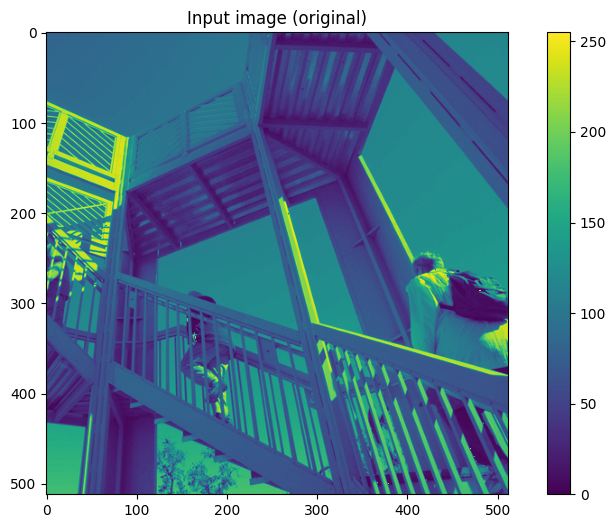

In [3]:
## Load a built-in test image.
image_int = scipy.misc.ascent()
print(f"'image_int' has shape {image_int.shape} and datatype {image_int.dtype}")

## Display the input image.
## Note that Matplotlib by default uses a colour map for single-channel images.
## The colour map is illustrated using the colour bar on the right.
plt.imshow(image_int)
plt.title('Input image (original)')
plt.colorbar();  # The semicolon suppresses the return value of the function.

'image' has shape (512, 512) and datatype float64


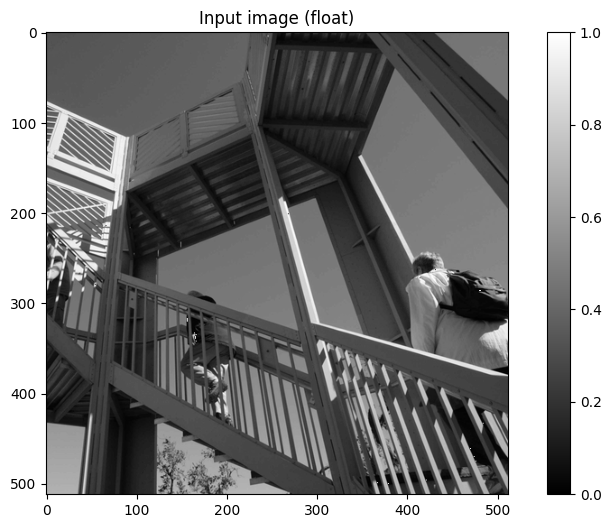

In [4]:
## Convert the image from integer 0..255 to float 0..1 for easier processing.
image = image_int.astype('float') / 255
print(f"'image' has shape {image.shape} and datatype {image.dtype}")

## Here, we override the default colour map using 'gray[scale]',
## and set the range of displayed values to vmin..vmax = 0..1.
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.title('Input image (float)')
plt.colorbar();

'image_crop' has shape (100, 100) and datatype float64


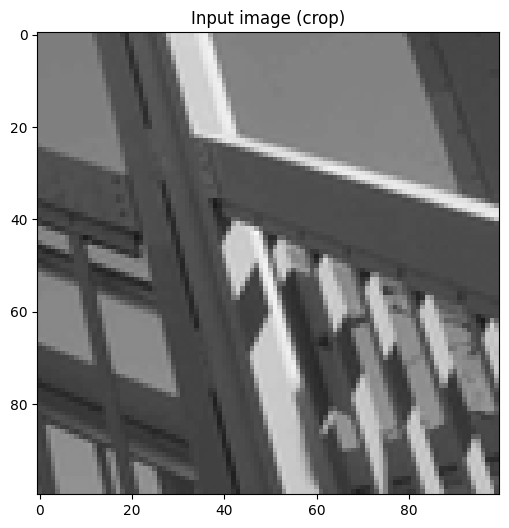

In [5]:
## Lets us crop out a subimage as a test image.
image_crop = image[300:400, 260:360]
print(f"'image_crop' has shape {image_crop.shape} and datatype {image_crop.dtype}")

## Display the image.
plt.imshow(image_crop, cmap='gray', vmin=0, vmax=1)
plt.title('Input image (crop)');

----
## 1. Basic convolution [40 marks]

Implement basic convolution by translating the pseudo-code below to Python.

Fill in the `basic_convolution(image, kernel)` below, which takes as input a grayscale `image` (2D matrix) and a filtering `kernel` (2D matrix), and returns the convolved image result as a greyscale image with the same size and datatype as the input image.

This operation can be described by the following pseudocode:
```
for each image row in input image:
    for each pixel in image row:
        set accumulator to zero
        
        for each kernel row in kernel:
            for each element in kernel row:
                if element position <corresponding to> pixel position then
                    multiply element value <corresponding to> pixel value
                    add result to accumulator
                endif

        set output image pixel to accumulator
```
(`<corresponding to>` input image pixels are found relative to the kernel’s origin)

Source: https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution

In [7]:
def basic_convolution(image, kernel, verbose=False):
    'Computes the convolution of an image with a kernel.'
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    output_image = np.zeros((image_height, image_width))
  # Iterate through each pixel in the input image
    for y in range(image_height):
        for x in range(image_width):
            accumulator = 0.0
            # Iterate through each element in the kernel
            for ky in range(kernel_height):
                for kx in range(kernel_width):
                    # Calculate the corresponding pixel position in the input image
                    pixel_y = y + ky - kernel_height // 2
                    pixel_x = x + kx - kernel_width // 2
    
                    # Check if the pixel position is valid
                    if pixel_y >= 0 and pixel_y < image_height and pixel_x >= 0 and pixel_x < image_width:
                        # Multiply the kernel element by the corresponding pixel value and add it to the accumulator
                        accumulator += kernel[ky, kx] * image[pixel_y, pixel_x]
    
            # Set the output image pixel to the accumulator value
            output_image[y, x] = accumulator

    print(output_image)
    return output_image    
  ## TASK: Replace this code with your own implementation of convolution.
  

### Test your result

Demonstrate the functionality of your function by running the following cell.
Does you result looked blurry?

[[0.17647059 0.23529412 0.29411765 ... 0.1654902  0.13270588 0.09960784]
 [0.23529412 0.31372549 0.39215686 ... 0.22086275 0.17694118 0.13270588]
 [0.29411765 0.39215686 0.49019608 ... 0.27607843 0.22117647 0.16580392]
 ...
 [0.15984314 0.21960784 0.32031373 ... 0.61254902 0.4585098  0.30447059]
 [0.12831373 0.17364706 0.25176471 ... 0.5065098  0.3827451  0.26070588]
 [0.0972549  0.12988235 0.18619608 ... 0.38854902 0.29552941 0.20439216]]


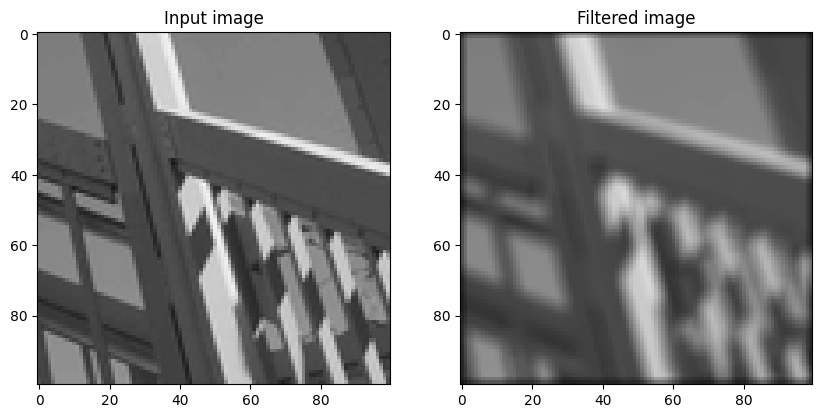

In [8]:
## Prepare a small convolution kernel (good for basic convolution).
kernel = np.ones([5, 5])
kernel = kernel / kernel.sum()  # normalise kernel

result1 = basic_convolution(image_crop, kernel)

## Display input image on the left.
plt.subplot(1, 2, 1); plt.title('Input image'); plt.imshow(image_crop, cmap='gray', vmin=0, vmax=1)

## Display filtered image on the right.
plt.subplot(1, 2, 2); plt.title('Filtered image'); plt.imshow(result1, cmap='gray', vmin=0, vmax=1);

----
## 2.	Border handling [20 marks]

Improve your implementation from the previous exercise:
1. Centre the filtered image, so that the content of the input and filtered images is not shifted between them; and
2. Fill in the border regions by extending/replicating the edge pixels of the image (‘clamp-to-edge’).

In [11]:
def extended_convolution(image, kernel, verbose=False):
  'Computes the convolution of an image with a kernel, with clamp-to-edge.'

  ## TASK: Replace this code with your own implementation of convolution.
  return basic_convolution(image, kernel)

### Test your result

A perfect result will match SciPy’s function `convolve` (with `mode='nearest'`) exactly, i.e. with a sum of squared differences (SSD) of 0 (zero):

[[0.18311838 0.22323052 0.27373913 ... 0.15420569 0.12543163 0.09159895]
 [0.24020289 0.29241923 0.37233498 ... 0.20935566 0.16464011 0.12085468]
 [0.30034928 0.38418357 0.49019608 ... 0.2757831  0.21592765 0.16805609]
 ...
 [0.16273741 0.21716054 0.32241889 ... 0.62276892 0.44899949 0.29449919]
 [0.12338489 0.16316238 0.2492368  ... 0.49327047 0.36499416 0.25308546]
 [0.08870781 0.12563558 0.18909056 ... 0.39848263 0.31615365 0.231993  ]]


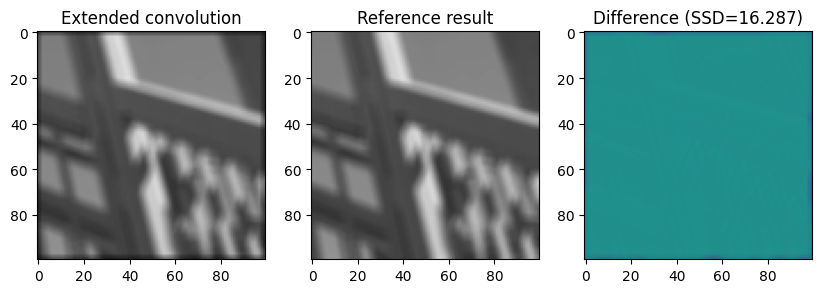

In [12]:
kernel = np.random.rand(5, 5)
kernel = kernel / kernel.sum()  # normalise kernel

filtered = extended_convolution(image_crop, kernel)
reference = scipy.ndimage.convolve(image_crop, kernel, mode='nearest')
ssd = np.sum(np.power(filtered - reference, 2))

plt.subplot(1, 3, 1); plt.title('Extended convolution');        plt.imshow(filtered,  cmap='gray', vmin=0,  vmax=1)
plt.subplot(1, 3, 2); plt.title('Reference result');            plt.imshow(reference, cmap='gray', vmin=0,  vmax=1)
plt.subplot(1, 3, 3); plt.title(f'Difference (SSD={ssd:.3f})'); plt.imshow(filtered - reference,   vmin=-1, vmax=1);

----
## 3. Image filtering [10 marks]

a) Design and demonstrate 3×3 convolution kernels for:
* computing horizontal, vertical and (any) diagonal image gradients, and
* sharpening an image using unsharp masking.

In [ ]:
## TASK: edit the gradient kernels:
hgrad = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])  # horizontal gradients
vgrad = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])  # vertical gradients
dgrad = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])  # diagonal gradients (any direction)

print("horizontal gradient kernel:"); print(hgrad); print()
print("vertical gradient kernel:");   print(vgrad); print()
print("diagonal gradient kernel:");   print(dgrad)

In [ ]:
## Perform convolutions with the gradient kernels
hgrad_result = scipy.ndimage.convolve(image_crop, hgrad, mode='nearest')
vgrad_result = scipy.ndimage.convolve(image_crop, vgrad, mode='nearest')
dgrad_result = scipy.ndimage.convolve(image_crop, dgrad, mode='nearest')

## Show results
plt.subplot(1, 3, 1); plt.title('Horizontal gradients'); plt.imshow(hgrad_result, cmap='gray', vmin=-1, vmax=1)
plt.subplot(1, 3, 2); plt.title('Vertical gradients');   plt.imshow(vgrad_result, cmap='gray', vmin=-1, vmax=1)
plt.subplot(1, 3, 3); plt.title('Diagonal gradients');   plt.imshow(dgrad_result, cmap='gray', vmin=-1, vmax=1);

In [ ]:
## TASK: unsharp masking kernel
usm = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])

print("Unsharp masking kernel:"); print(usm)
usm_result = scipy.ndimage.convolve(image_crop, usm, mode='nearest')
plt.title('Unsharp masking'); plt.imshow(usm_result, cmap='gray', vmin=0, vmax=1);

b) Compute the kernel for a 5×5 Gaussian blur with a standard deviation of 1 pixel.
Make sure that the kernel is normalised.

In [ ]:
## TASK: 5x5 Gaussian kernel with standard deviation of 1 pixel
gauss = np.zeros([5, 5])
gauss[2, 2] = 1

print("Gaussian 5x5 kernel:"); print(gauss)
print(f"\nSum of elements: {gauss.sum()}")
gauss_result = scipy.ndimage.convolve(image_crop, gauss, mode='nearest')
plt.title('Gaussian filtering'); plt.imshow(gauss_result, cmap='gray', vmin=0, vmax=1);

----
## 4.	Exploiting the convolution theorem [30 marks]

Apply the convolution theorem to speed up the convolution.

You can use NumPy’s functions for 2D Fast Fourier Transform (FFT), `np.fft.fft2` and its inverse `np.fft.ifft2`.

In [ ]:
def fft_convolution(image, kernel):
  'Computes the convolution of an image with a kernel using FFT.'

  ## TASK: Replace this code with your own implementation of convolution.
  return np.ones_like(image)

### Test your result

A perfect result will match SciPy’s function `convolve` (with `mode='nearest'`) exactly, i.e. with a sum of squared differences (SSD) of 0 (zero):

In [ ]:
kernel = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
kernel = kernel / kernel.sum()  # normalise kernel

filtered = fft_convolution(image_crop, kernel)
reference = scipy.ndimage.convolve(image_crop, kernel, mode='nearest')
ssd = np.sum(np.power(filtered - reference, 2))

plt.subplot(1, 3, 1); plt.title('Fast convolution');            plt.imshow(filtered,  cmap='gray', vmin=0,  vmax=1)
plt.subplot(1, 3, 2); plt.title('Reference result');            plt.imshow(reference, cmap='gray', vmin=0,  vmax=1)
plt.subplot(1, 3, 3); plt.title(f'Difference (SSD={ssd:.3f})'); plt.imshow(filtered - reference,   vmin=-1, vmax=1);

### Run-time comparison *(optional)*

You can use the following code to compare the run times of your FFT-based convolution function with “extended_convolution” above for different kernel sizes.
Please this code comment out when submitting your code, as it slows down the marking process.

In [ ]:
# import time

# print('Kernel size  | Naive (crop) | FFT (crop) | FFT (full image)')
# for kernel_size in range(1, 10):
#   print(f"{kernel_size}-by-{kernel_size}".center(13), end='')
#   kernel = np.ones([kernel_size, kernel_size]) / kernel_size ** 2

#   tic = time.time()
#   result = extended_convolution(image_crop, kernel)
#   elapsed = time.time() - tic
#   print(f"| {elapsed:12.3f} ", end='')
  
#   tic = time.time()
#   result = fft_convolution(image_crop, kernel)
#   elapsed = time.time() - tic
#   print(f"| {elapsed:10.3f} ", end='')
  
#   tic = time.time()
#   result = fft_convolution(image, kernel)
#   elapsed = time.time() - tic
#   print(f"| {elapsed:10.3f}")